# Create Data for PCA

In [487]:
import numpy as np
import math
np.random.seed(4294967295) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 500).T
# class1_sample *= 10

Populating the interactive namespace from numpy and matplotlib


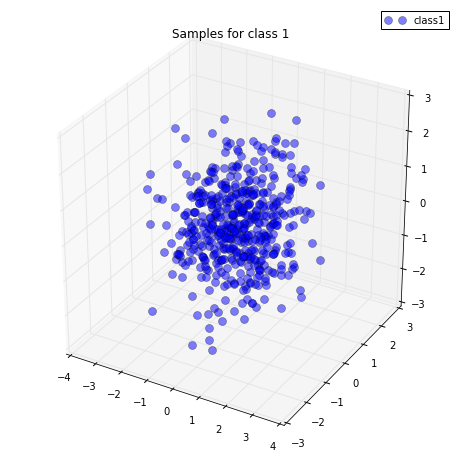

In [488]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')

plt.title('Samples for class 1')
ax.legend(loc='upper right')

plt.show()

In [489]:
all_samples = class1_sample
print 'sample data'
np.shape(all_samples)

sample data


(3, 500)

# PCA

In [490]:
from sklearn.decomposition import PCA as sklearnPCA

In [491]:
print shape(all_samples.T)
pca = sklearnPCA(n_components=3)
fitted = pca.fit(all_samples.T)
trans = pca.transform(all_samples.T)
print shape(trans)

(500, 3)
(500, 3)


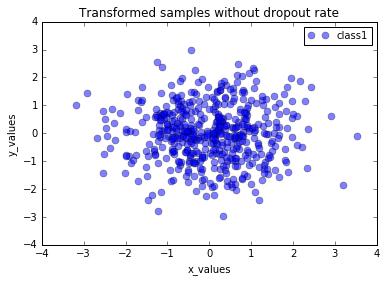

In [492]:
plt.plot(trans[:,0],trans[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples without dropout rate')

plt.show()

# Apply Drop Out Rate ($e^{-\lambda\mu^2}$) / Gaussian Noise

I believe the proper order is:
1. generate low dim data
2. add gaussian noise to low dim
3. project back to high dim and apply drop out rate

In [493]:
lmbda = -1
mu = 2
p_0 = math.e**(lmbda * mu**2)
p_0

0.018315638888734186

In [494]:
def drop_out(p):
    return np.random.binomial(1, p, 1)[0]


In [495]:
s = np.random.binomial(1, p_0, 100000000)
print sum(s)/10000000.0


0.1830478


In [496]:
t = all_samples.T
shape(t)[0]

500

In [497]:
#gaussian noise
noise_m = .25 * np.random.randn(shape(all_samples.T)[0], shape(all_samples.T)[1]) 
noise_m

array([[-0.18809586,  0.50714103, -0.00093909],
       [-0.58919272,  0.04146732, -0.26910334],
       [-0.08678456, -0.3459106 , -0.21950381],
       ..., 
       [ 0.13182265, -0.00244313, -0.05792194],
       [-0.18964311,  0.36366496,  0.7074881 ],
       [ 0.19545697,  0.29753583, -0.00174026]])

# dropped out data

In [498]:
noise_drop_matrix = all_samples.T + noise_m
for (i,j), value in numpy.ndenumerate(noise_drop_matrix):
    if (drop_out(p_0) == 1):
        noise_drop_matrix[i,j] = 0

In [499]:
noise_drop_matrix

array([[ 0.46031281,  1.17646456, -1.08148282],
       [-0.30469167,  0.15535505,  0.59851856],
       [-0.13081058, -0.09713898, -1.20773396],
       ..., 
       [ 2.05804114,  0.04953911, -1.14862346],
       [-0.43919831,  0.19117595,  3.04938085],
       [-0.79116497,  1.85657519, -0.03582089]])

In [500]:
# pca = sklearnPCA(n_components=3)
# fitted = pca.fit(all_samples.T)
# red = np.dot(all_samples.T - pca.mean_, pca.components_.T)
# original = np.dot(red, pca.components_) + pca.mean_
#shape(all_samples.T)
# shape(original)
#test
#np.allclose(pca.inverse_transform(pca.transform(all_samples.T)), all_samples.T)

In [501]:
#--test cell--

# Visualization Check

Populating the interactive namespace from numpy and matplotlib


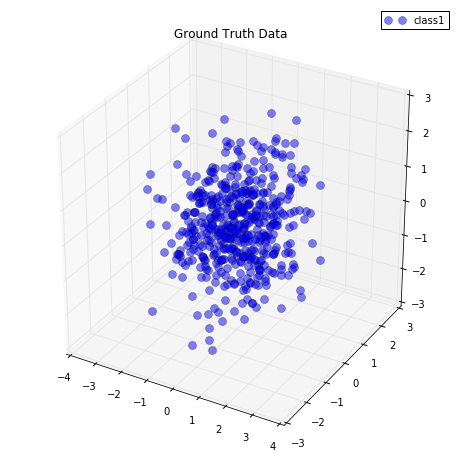

Populating the interactive namespace from numpy and matplotlib


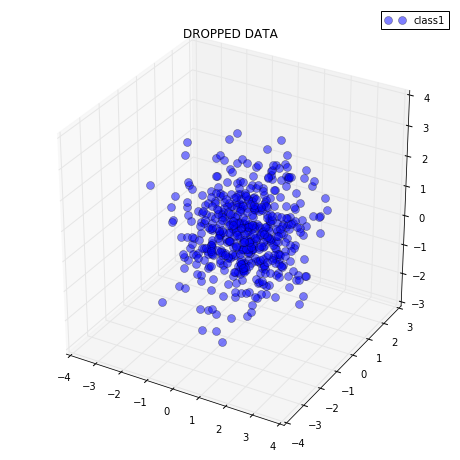

In [503]:
%pylab inline

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')

plt.title('Ground Truth Data')
ax.legend(loc='upper right')

plt.show()


%pylab inline

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(noise_drop_matrix.T[0,:], noise_drop_matrix.T[1,:], noise_drop_matrix.T[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')

plt.title('DROPPED DATA')
ax.legend(loc='upper right')

plt.show()

# PCA Visualization Check

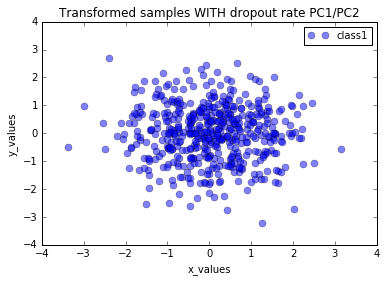

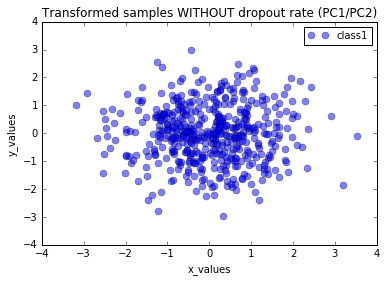

In [508]:
plt.plot(noise_drop_matrix[:,0],noise_drop_matrix[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples WITH dropout rate PC1/PC2')

plt.show()

plt.plot(trans[:,0],trans[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples WITHOUT dropout rate (PC1/PC2)')

plt.show()

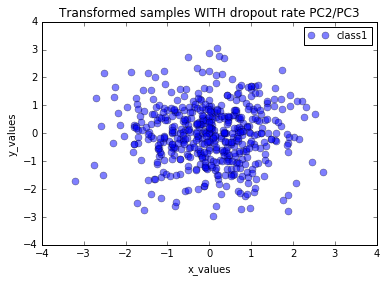

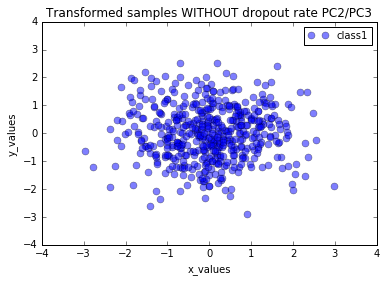

In [509]:
plt.plot(noise_drop_matrix[:,1],noise_drop_matrix[:,2], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples WITH dropout rate PC2/PC3')

plt.show()

plt.plot(trans[:,1],trans[:,2], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples WITHOUT dropout rate PC2/PC3')

plt.show()

# Fix time